# Project 1: SAT & ACT Analysis

## Problem Statement

1) What is the relationship between participation and test scores?
2) How can we increase participation for the SAT?

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of your notebook. 

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Imports:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import os

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data


In [2]:
# read in sat data
sat_2017 = pd.read_csv('../data/sat_2017.csv')

In [3]:
# read in act data
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Preview and inspect the data


In [4]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [5]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [6]:
print(sat_2017.shape)
print(act_2017.shape)

(51, 5)
(52, 7)


In [7]:
print(sat_2017.info())
print(act_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-nu

In [8]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [9]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Look for errors in the data


Hint - Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

a)  "Wyoming" has a typo in the "Composite" column in the ACT dataset. It says "20.2x" instead of "20.2".

b)  "Maryland" has a typo in the "Science" column in the ACT dataset. It says "2.3" instead of "23.2".

c)  "Maryland" has a typo in the "Math" column in the SAT dataset. It says "52" instead of "524".

#### 4. Fix any errors you identified

a) Fix typo in "Wyoming" row of "Composite" column from 2017 ACT dataset.

In [10]:
act_2017.loc[51, 'Composite'] = 20.2

In [11]:
act_2017.loc[51, 'Composite']

20.2

b) Fix typo in "Maryland" row of "Science" column in 2017 ACT 2017 dataset.

In [12]:
act_2017.loc[21,'Science'] = 23.2

In [13]:
act_2017.loc[21,'Science']

23.2

c) Fix typo in "Maryland" row of "Math" column from 2017 SAT dataset.

In [14]:
sat_2017.loc[20,'Math'] = 524

In [15]:
sat_2017.loc[20,'Math']

524

#### 5. Fix any incorrect data types

a) Fix 2017 SAT data in "Participation" column.

In [16]:
# function that converts strings to floats
def string_to_float(string):
    return float(string.strip('%')) / 100

In [17]:
sat_2017['Participation'] = sat_2017['Participation'].map(string_to_float)

In [18]:
sat_2017.dtypes 

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

b) Fix 2017 ACT data in "Composite" column.

In [19]:
act_2017['Composite'] = act_2017['Composite'].map(float)

c) Fix 2017 ACT data in "Participation" column.

In [20]:
act_2017['Participation'] = act_2017['Participation'].map(string_to_float)

In [21]:
act_2017.dtypes 

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 6. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference between the SAT columns and the ACT columns. Remember that you have data from multiple years.

a) Change column names to be all lowercase.

In [22]:
sat_2017.columns = [col.lower() for col in sat_2017.columns]

In [23]:
act_2017.columns = [col.lower() for col in act_2017.columns]

b) Column names should not contain spaces. 

In [24]:
list(sat_2017.columns)

['state',
 'participation',
 'evidence-based reading and writing',
 'math',
 'total']

In [25]:
list(act_2017.columns)

['state',
 'participation',
 'english',
 'math',
 'reading',
 'science',
 'composite']

c) Column names should be unique and informative.

In [26]:
sat_2017.rename({'participation': 'sat participation',
                 'evidence-based reading and writing':'sat read & write',
                 'math':'sat math',
                 'total':'sat total'}, axis='columns', inplace = True)

In [27]:
act_2017.rename({'participation': 'act participation',
                 'english': 'act english',
                 'math': 'act math',
                 'reading': 'act reading',
                 'science': 'act science',
                 'composite': 'act composite'}, axis='columns', inplace = True)

#### 7. Create a data dictionary

Below is a data dictionary that features different features of the data, along with the type, which dataset it came from, and brief description. 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|*object*|ACT/SAT|A state in the United States of America| 
|year|*int*|ACT/SAT|Year the test was taken| 
|act participation|*float*|ACT|Percentage of high school students who took ACT| 
|act english|*float*|ACT|Composite score for English| 
|act math|*float*|ACT|Composite score for Math| 
|act reading|*float*|ACT|Composite score for Reading| 
|act science|*float*|ACT|Composite score for Science| 
|act composite|*float*|ACT|Composite score for ACT| 
|sat participation|*float*|SAT|Percentage of high school students who took SAT| 
|sat read & write|*int*|SAT|Score for Evidence Based Reading and Writing| 
|sat math|*int*|SAT|Score for Math| 
|sat total|*int*|SAT|Total Score for SAT| 

#### 8. Drop any unnecessary rows

"National" is listed in the "State" column in the ACT dataset but not in the SAT dataset.

In [28]:
act_2017.drop(index=0, inplace =True)

In [29]:
act_2017.head()

,state,act participation,act english,act math,act reading,act science,act composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 9. Merge Dataframes

Join the 2017 ACT and SAT DataFrames using the _state_ in each DataFrame as the key.

In [30]:
combined_2017 = pd.merge(act_2017, sat_2017, on = 'state')
combined_2017.insert(1, 'year', 2017)

In [31]:
combined_2017.head()

,state,year,act participation,act english,act math,act reading,act science,act composite,sat participation,sat read & write,sat math,sat total
0,Alabama,2017,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,2017,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,2017,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,2017,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,2017,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 10. Save your cleaned, merged dataframe

Use a relative path to save your data as `combined_2017.csv`.

In [32]:
path = '../output/'

if not os.path.exists(path):
    os.makedirs(path)

combined_2017.to_csv(path + 'combined_2017.csv')

# 2018 & 2019 Data Import and Cleaning

Read in the 2018 data. Inspect and clean. Save. Do the same with the 2019 data.

Read in data.

In [33]:
# read in SAT data
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv', encoding='latin-1')

# read in ACT data
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')

Inspect data.

In [34]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [35]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [36]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [37]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [38]:
print(sat_2018.shape)
print(sat_2019.shape)
print(act_2018.shape)
print(act_2019.shape)

(51, 5)
(53, 5)
(52, 3)
(52, 3)


Remove "Virgin Islands" and "Puerto Rico" listed in "State" column for the 2019 SAT dataset.

In [39]:
sat_2019.set_index("State", inplace = True)

In [40]:
sat_2019 = sat_2019.drop(index = "Puerto Rico")

In [41]:
sat_2019 = sat_2019.drop(index = "Virgin Islands")

In [42]:
sat_2019.reset_index(inplace = True)

Thing to note: Not really an error, but an inconsistency: we have data for each section (English, Math, Reading, Science) in the 2017 ACT dataset but not in the 2018 or 2019 dataset.

Fix incorrect data types.

In [43]:
sat_2018['Participation'] = sat_2018['Participation'].map(string_to_float)

In [44]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [45]:
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].map(string_to_float)

In [46]:
sat_2019.dtypes

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

In [47]:
act_2018['Participation'] = act_2018['Participation'].map(string_to_float)

In [48]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [49]:
act_2019['Participation'] = act_2019['Participation'].map(string_to_float)

In [50]:
act_2019.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

Make all the column names lowercase.

In [51]:
sat_2018.columns = [col.lower() for col in sat_2018.columns]

In [52]:
sat_2019.columns = [col.lower() for col in sat_2019.columns]

In [53]:
act_2018.columns = [col.lower() for col in act_2018.columns]

In [54]:
act_2019.columns = [col.lower() for col in act_2019.columns]

Make each column unique.

In [55]:
sat_2018.rename({'participation':'sat participation',
                 'evidence-based reading and writing':'sat read & write',
                 'math': 'sat math',
                 'total':'sat total'}, axis='columns', inplace = True)

In [56]:
sat_2019.rename({'participation rate':'sat participation',
                 'ebrw':'sat read & write',
                 'math': 'sat math',
                 'total':'sat total'}, axis='columns', inplace = True)

In [57]:
act_2018.rename({'participation': 'act participation',
                 'english': 'act english',
                 'math': 'act math',
                 'reading': 'act reading',
                 'science': 'act science',
                 'composite': 'act composite'}, axis='columns', inplace = True)

In [58]:
act_2019.rename({'participation': 'act participation',
                 'english': 'act english',
                 'math': 'act math',
                 'reading': 'act reading',
                 'science': 'act science',
                 'composite': 'act composite'}, axis='columns', inplace = True)

## Combine your 2017, 2018, and 2019 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically.

 Make sure none of your columns (other than state) have identical names.

In [59]:
sat_2017.columns

Index(['state', 'sat participation', 'sat read & write', 'sat math',
       'sat total'],
      dtype='object')

In [60]:
sat_2018.columns

Index(['state', 'sat participation', 'sat read & write', 'sat math',
       'sat total'],
      dtype='object')

In [61]:
sat_2019.columns

Index(['state', 'sat participation', 'sat read & write', 'sat math',
       'sat total'],
      dtype='object')

In [62]:
act_2017.columns

Index(['state', 'act participation', 'act english', 'act math', 'act reading',
       'act science', 'act composite'],
      dtype='object')

In [63]:
act_2018.columns

Index(['state', 'act participation', 'act composite'], dtype='object')

In [64]:
act_2019.columns

Index(['state', 'act participation', 'act composite'], dtype='object')

Combine 2017, 2018, and 2019 data into one dataframe.

In [65]:
# merge SAT and ACT data from 2018
combined_2018 = pd.merge(act_2018, sat_2018, on = 'state')
combined_2018['year'] = 2018
combined_2018.head()

,state,act participation,act composite,sat participation,sat read & write,sat math,sat total,year
0,Alabama,1.00,19.1,0.06,595,571,1166,2018
1,Alaska,0.33,20.8,0.43,562,544,1106,2018
2,Arizona,0.66,19.2,0.29,577,572,1149,2018
3,Arkansas,1.00,19.4,0.05,592,576,1169,2018
4,California,0.27,22.7,0.60,540,536,1076,2018


In [66]:
# merge SAT and ACT data from 2019
combined_2019 = pd.merge(act_2019, sat_2019, on = 'state')
combined_2019['year'] = 2019
combined_2019.head()

,state,act participation,act composite,sat participation,sat read & write,sat math,sat total,year
0,Alabama,1.00,18.9,0.07,583,560,1143,2019
1,Alaska,0.38,20.1,0.41,556,541,1097,2019
2,Arizona,0.73,19.0,0.31,569,565,1134,2019
3,Arkansas,1.00,19.3,0.06,582,559,1141,2019
4,California,0.23,22.6,0.63,534,531,1065,2019


In [67]:
# append 2018 data to 2017 data
final = combined_2017.append(combined_2018, sort = False)

In [68]:
# append 2019 data to 2017 & 2018 data
final = final.append(combined_2019, sort = False)

In [69]:
# make state index for easier visualization and analazying states
final.set_index('state', inplace=True)

In [70]:
final

,year,act participation,act english,act math,act reading,act science,act composite,sat participation,sat read & write,sat math,sat total
state,,,,,,,,,,,
Alabama,2017,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
Alaska,2017,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
Arizona,2017,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
Arkansas,2017,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
California,2017,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055
...,...,...,...,...,...,...,...,...,...,...,...
Virginia,2019,0.21,NaN,NaN,NaN,NaN,24.0,0.68,567,551,1119
Washington,2019,0.24,NaN,NaN,NaN,NaN,22.1,0.70,539,535,1074
West Virginia,2019,0.49,NaN,NaN,NaN,NaN,20.8,0.99,483,460,943


Save the contents of this merged DataFrame as `final.csv`.

**Use this combined DataFrame for the remainder of the project**.

In [71]:
path = '../output/'

if not os.path.exists(path):
    os.makedirs(path)

final.to_csv(path + 'final.csv')

# Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [72]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
year,153.0,2018.000000,0.819178,2017.00,2017.00,2018.00,2019.00,2019.0
act participation,153.0,0.617190,0.336750,0.06,0.29,0.66,1.00,1.0
act english,51.0,20.931373,2.353677,16.30,19.00,20.70,23.30,25.5
act math,51.0,21.182353,1.981989,18.00,19.40,20.90,23.10,25.3
act reading,51.0,22.013725,2.067271,18.10,20.45,21.80,24.15,26.0
act science,51.0,21.450980,1.739353,18.20,19.95,21.30,23.20,24.9
act composite,153.0,21.496078,2.099213,17.70,19.80,21.30,23.70,25.6
sat participation,153.0,0.449150,0.371572,0.02,0.04,0.50,0.76,1.0
sat read & write,153.0,564.633987,46.173123,480.00,531.00,554.00,614.00,644.0
sat math,153.0,555.241830,48.300734,460.00,521.00,546.00,596.00,655.0


## Investigate trends in the data
Using sorting to consider the following questions:

- Which states have the highest and lowest participation rates for each test for each year?
- Which states have the highest and lowest mean total/composite scores for each test for each year?
- Which states have large changes in participation or scores?

**Find participation rates for the 2017 SAT:**

In [73]:
sat_2017_part = final.loc[final['year']==2017,['sat participation']].sort_values(by = 'sat participation')

States with lowest participation rates for the 2017 SAT:

In [74]:
sat_2017_part.head(10)

,sat participation
state,
North Dakota,0.02
Mississippi,0.02
Iowa,0.02
Missouri,0.03
Utah,0.03
South Dakota,0.03
Nebraska,0.03
Wisconsin,0.03
Minnesota,0.03


States with highest participation rates for the 2017 SAT:

In [75]:
sat_2017_part.tail(10)

,sat participation
state,
Rhode Island,0.71
Massachusetts,0.76
Florida,0.83
Idaho,0.93
Maine,0.95
New Hampshire,0.96
Michigan,1.00
District of Columbia,1.00
Delaware,1.00


**Find participation rates for the 2018 SAT.**

In [76]:
sat_2018_part = final.loc[final['year']==2018,['sat participation']].sort_values(by = 'sat participation')

States with lowest participation rates for the 2018 SAT:

In [77]:
sat_2018_part.head(15)

,sat participation
state,
North Dakota,0.02
Wyoming,0.03
South Dakota,0.03
Nebraska,0.03
Wisconsin,0.03
Mississippi,0.03
Iowa,0.03
Utah,0.04
Minnesota,0.04


States with highest participation rates for the 2018 SAT:

In [78]:
sat_2018_part.tail(10)

,sat participation
state,
New Hampshire,0.96
Rhode Island,0.97
Illinois,0.99
Maine,0.99
Maine,0.99
Idaho,1.00
Colorado,1.00
Connecticut,1.00
Delaware,1.00


**Find participation rates for the 2019 SAT.**

In [79]:
sat_2019_part = final.loc[final['year']==2019,['sat participation']].sort_values(by = 'sat participation')

States with lowest participation rates for the 2019 SAT:

In [80]:
sat_2019_part.head(10)

,sat participation
state,
North Dakota,0.02
Wyoming,0.03
South Dakota,0.03
Nebraska,0.03
Wisconsin,0.03
Mississippi,0.03
Iowa,0.03
Utah,0.04
Minnesota,0.04


States with highest participation rates for the 2019 SAT:

In [81]:
sat_2019_part.tail(10)

,sat participation
state,
West Virginia,0.99
Maine,0.99
Florida,1.00
Rhode Island,1.00
Colorado,1.00
Connecticut,1.00
Delaware,1.00
Michigan,1.00
Illinois,1.00


**Find participation rates for the 2017 ACT.**

In [82]:
act_2017_part = final.loc[final['year']==2017,['act participation']].sort_values(by = 'act participation')

States with lowest participation rates for the 2017 ACT:

In [83]:
act_2017_part.head(10)

,act participation
state,
Maine,0.08
New Hampshire,0.18
Delaware,0.18
Rhode Island,0.21
Pennsylvania,0.23
Maryland,0.28
Vermont,0.29
Massachusetts,0.29
Michigan,0.29


States with highest participation rates for the 2017 ACT:

In [84]:
act_2017_part.tail(10)

,act participation
state,
Montana,1.0
Wisconsin,1.0
Mississippi,1.0
Minnesota,1.0
Louisiana,1.0
Kentucky,1.0
Colorado,1.0
Arkansas,1.0
Oklahoma,1.0


**Find participation rates for the 2018 ACT.**

In [85]:
act_2018_part = final.loc[final['year']==2018,['act participation']].sort_values(by = 'act participation')

States with highest lowest rates for the 2018 ACT:

In [86]:
act_2018_part.head(10)

,act participation
state,
Maine,0.07
Maine,0.07
Rhode Island,0.15
New Hampshire,0.16
Delaware,0.17
Pennsylvania,0.20
Michigan,0.22
Washington,0.24
Virginia,0.24


States with highest participation rates for the 2018 ACT:

In [87]:
act_2018_part.tail(20)

,act participation
state,
Hawaii,0.89
North Dakota,0.98
Minnesota,0.99
Tennessee,1.00
Utah,1.00
South Carolina,1.00
Alabama,1.00
Missouri,1.00
Ohio,1.00


**Find participation rates for the 2019 ACT.**

In [88]:
act_2019_part = final.loc[final['year']==2019,['act participation']].sort_values(by = 'act participation')

States with lowest rates for the 2019 ACT:

In [89]:
act_2019_part.head(15)

,act participation
state,
Maine,0.06
Rhode Island,0.12
Delaware,0.13
New Hampshire,0.14
Pennsylvania,0.17
Michigan,0.19
Vermont,0.20
Virginia,0.21
Massachusetts,0.21


States with highest rates for the 2017 ACT:

In [90]:
act_2019_part.tail(15)

,act participation
state,
Utah,1.0
Tennessee,1.0
Alabama,1.0
Ohio,1.0
North Carolina,1.0
Nevada,1.0
Nebraska,1.0
Montana,1.0
Wisconsin,1.0


**Find mean total scores for the 2017 SAT.**

In [91]:
sat_2017_mean_score = final.loc[final['year']==2017,['sat total']].sort_values(by = 'sat total')

States with lowest scores for the 2017 SAT:

In [92]:
sat_2017_mean_score.head()

,sat total
state,
District of Columbia,950
Delaware,996
Idaho,1005
Michigan,1005
Maine,1012


States with highest scores for the 2017 SAT:

In [93]:
sat_2017_mean_score.tail()

,sat total
state,
Kansas,1260
Missouri,1271
Iowa,1275
Wisconsin,1291
Minnesota,1295


**Find mean total score for the 2018 SAT.**

In [94]:
sat_2018_mean_score = final.loc[final['year']==2018,['sat total']].sort_values(by = 'sat total')

States with lowest scores for the 2018 SAT:

In [95]:
sat_2018_mean_score.head()

,sat total
state,
Delaware,998
West Virginia,999
Idaho,1001
Hawaii,1010
Utah,1010


States with highest scores for the 2018 SAT:

In [96]:
sat_2018_mean_score.tail()

,sat total
state,
Kansas,1265
Iowa,1265
North Dakota,1283
Wisconsin,1294
Minnesota,1298


**Find mean total score for the 2019 SAT.**

In [97]:
sat_2019_mean_score = final.loc[final['year']==2019,['sat total']].sort_values(by = 'sat total')

States with lowest scores for the 2019 SAT:

In [98]:
sat_2019_mean_score.head()

,sat total
state,
West Virginia,943
Oklahoma,963
District of Columbia,975
Delaware,985
Idaho,993


States with highest scores for the 2019 SAT:

In [99]:
sat_2019_mean_score.tail()

,sat total
state,
Nebraska,1260
North Dakota,1263
South Dakota,1268
Wisconsin,1283
Minnesota,1284


**Find mean composite score for the 2017 ACT.**

In [100]:
act_2017_mean_score = final.loc[final['year']==2017,['act composite']].sort_values(by = 'act composite')

States with lowest scores for the 2017 ACT:

In [101]:
act_2017_mean_score.head()

,act composite
state,
Nevada,17.8
Mississippi,18.6
South Carolina,18.7
Hawaii,19.0
North Carolina,19.1


States with highest scores for the 2017 ACT:

In [102]:
act_2017_mean_score.tail()

,act composite
state,
District of Columbia,24.2
Maine,24.3
Connecticut,25.2
Massachusetts,25.4
New Hampshire,25.5


**Find mean composite score for the 2018 ACT.**

In [103]:
act_2018_mean_score = final.loc[final['year']== 2018,['act composite']].sort_values(by = 'act composite')

States with lowest scores for the 2018 ACT:

In [104]:
act_2018_mean_score.head()

,act composite
state,
Nevada,17.7
South Carolina,18.3
Mississippi,18.6
Hawaii,18.9
Alabama,19.1


States with highest scores for the 2018 ACT:

In [105]:
act_2018_mean_score.tail()

,act composite
state,
Rhode Island,24.2
New York,24.5
New Hampshire,25.1
Massachusetts,25.5
Connecticut,25.6


**Find mean composite score for the 2019 ACT.**

In [106]:
act_2019_mean_score = final.loc[final['year']== 2019,['act composite']].sort_values(by = 'act composite')

States with lowest scores for the 2019 ACT:

In [107]:
act_2019_mean_score.head()

,act composite
state,
Nevada,17.9
Mississippi,18.4
South Carolina,18.8
Louisiana,18.8
Alabama,18.9


States with highest scores for the 2019 ACT:

In [108]:
act_2019_mean_score.tail()

,act composite
state,
New York,24.5
Rhode Island,24.7
New Hampshire,25.0
Connecticut,25.5
Massachusetts,25.5


**Find changes in participation or scores for the SAT.**

In [109]:
sat_changes = final.loc[:,['sat participation','sat total', 'year']].sort_values(by = 'state')

In [110]:
sat_changes.groupby('year').mean()

,sat participation,sat total
year,,
2017,0.398039,1126.098039
2018,0.458824,1120.725490
2019,0.490588,1113.078431


In [111]:
act_changes = final.loc[:,['act participation','act composite', 'year']].sort_values(by = 'state')

In [112]:
act_changes.groupby('year').mean()

,act participation,act composite
year,,
2017,0.652549,21.519608
2018,0.612353,21.503922
2019,0.586667,21.464706


Based on what you've just observed, have you identified any states that you're especially interested in? If so, why?

Colorado participation rates changed drastically for ACT and SAT after the year 2017.

## Visualize the data

There's not a magic recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Font size is easy to read on a slide
- Plots demonstrate meaningful and valid relationships
- Interpret plots to aid audience understanding

Feel free to make functions to quickly plot relationships (e.g. if you want to make a lot of histograms).



#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

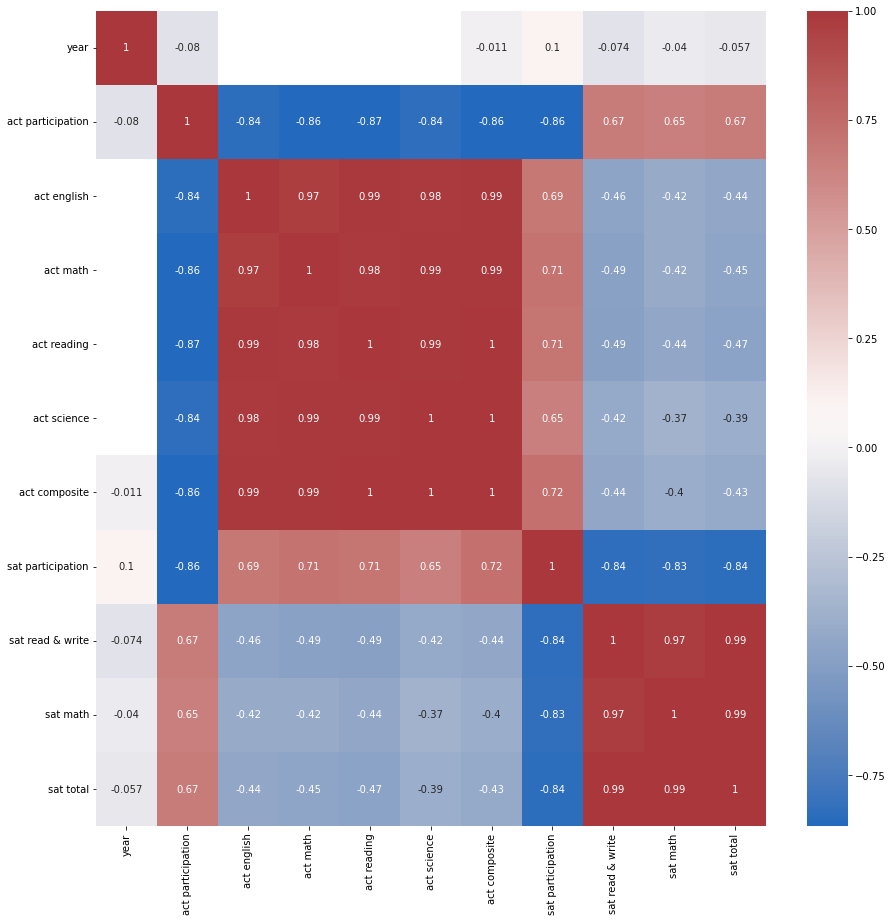

In [113]:
#mask = np.zeros_like(final.corr())
#mask[np.triu_indices_from(mask)] = True 

plt.figure(figsize=(15, 15))
sns.heatmap(final.corr(), cmap='vlag', annot=True);

#### Use Seaborn's pairplot for relevant columns

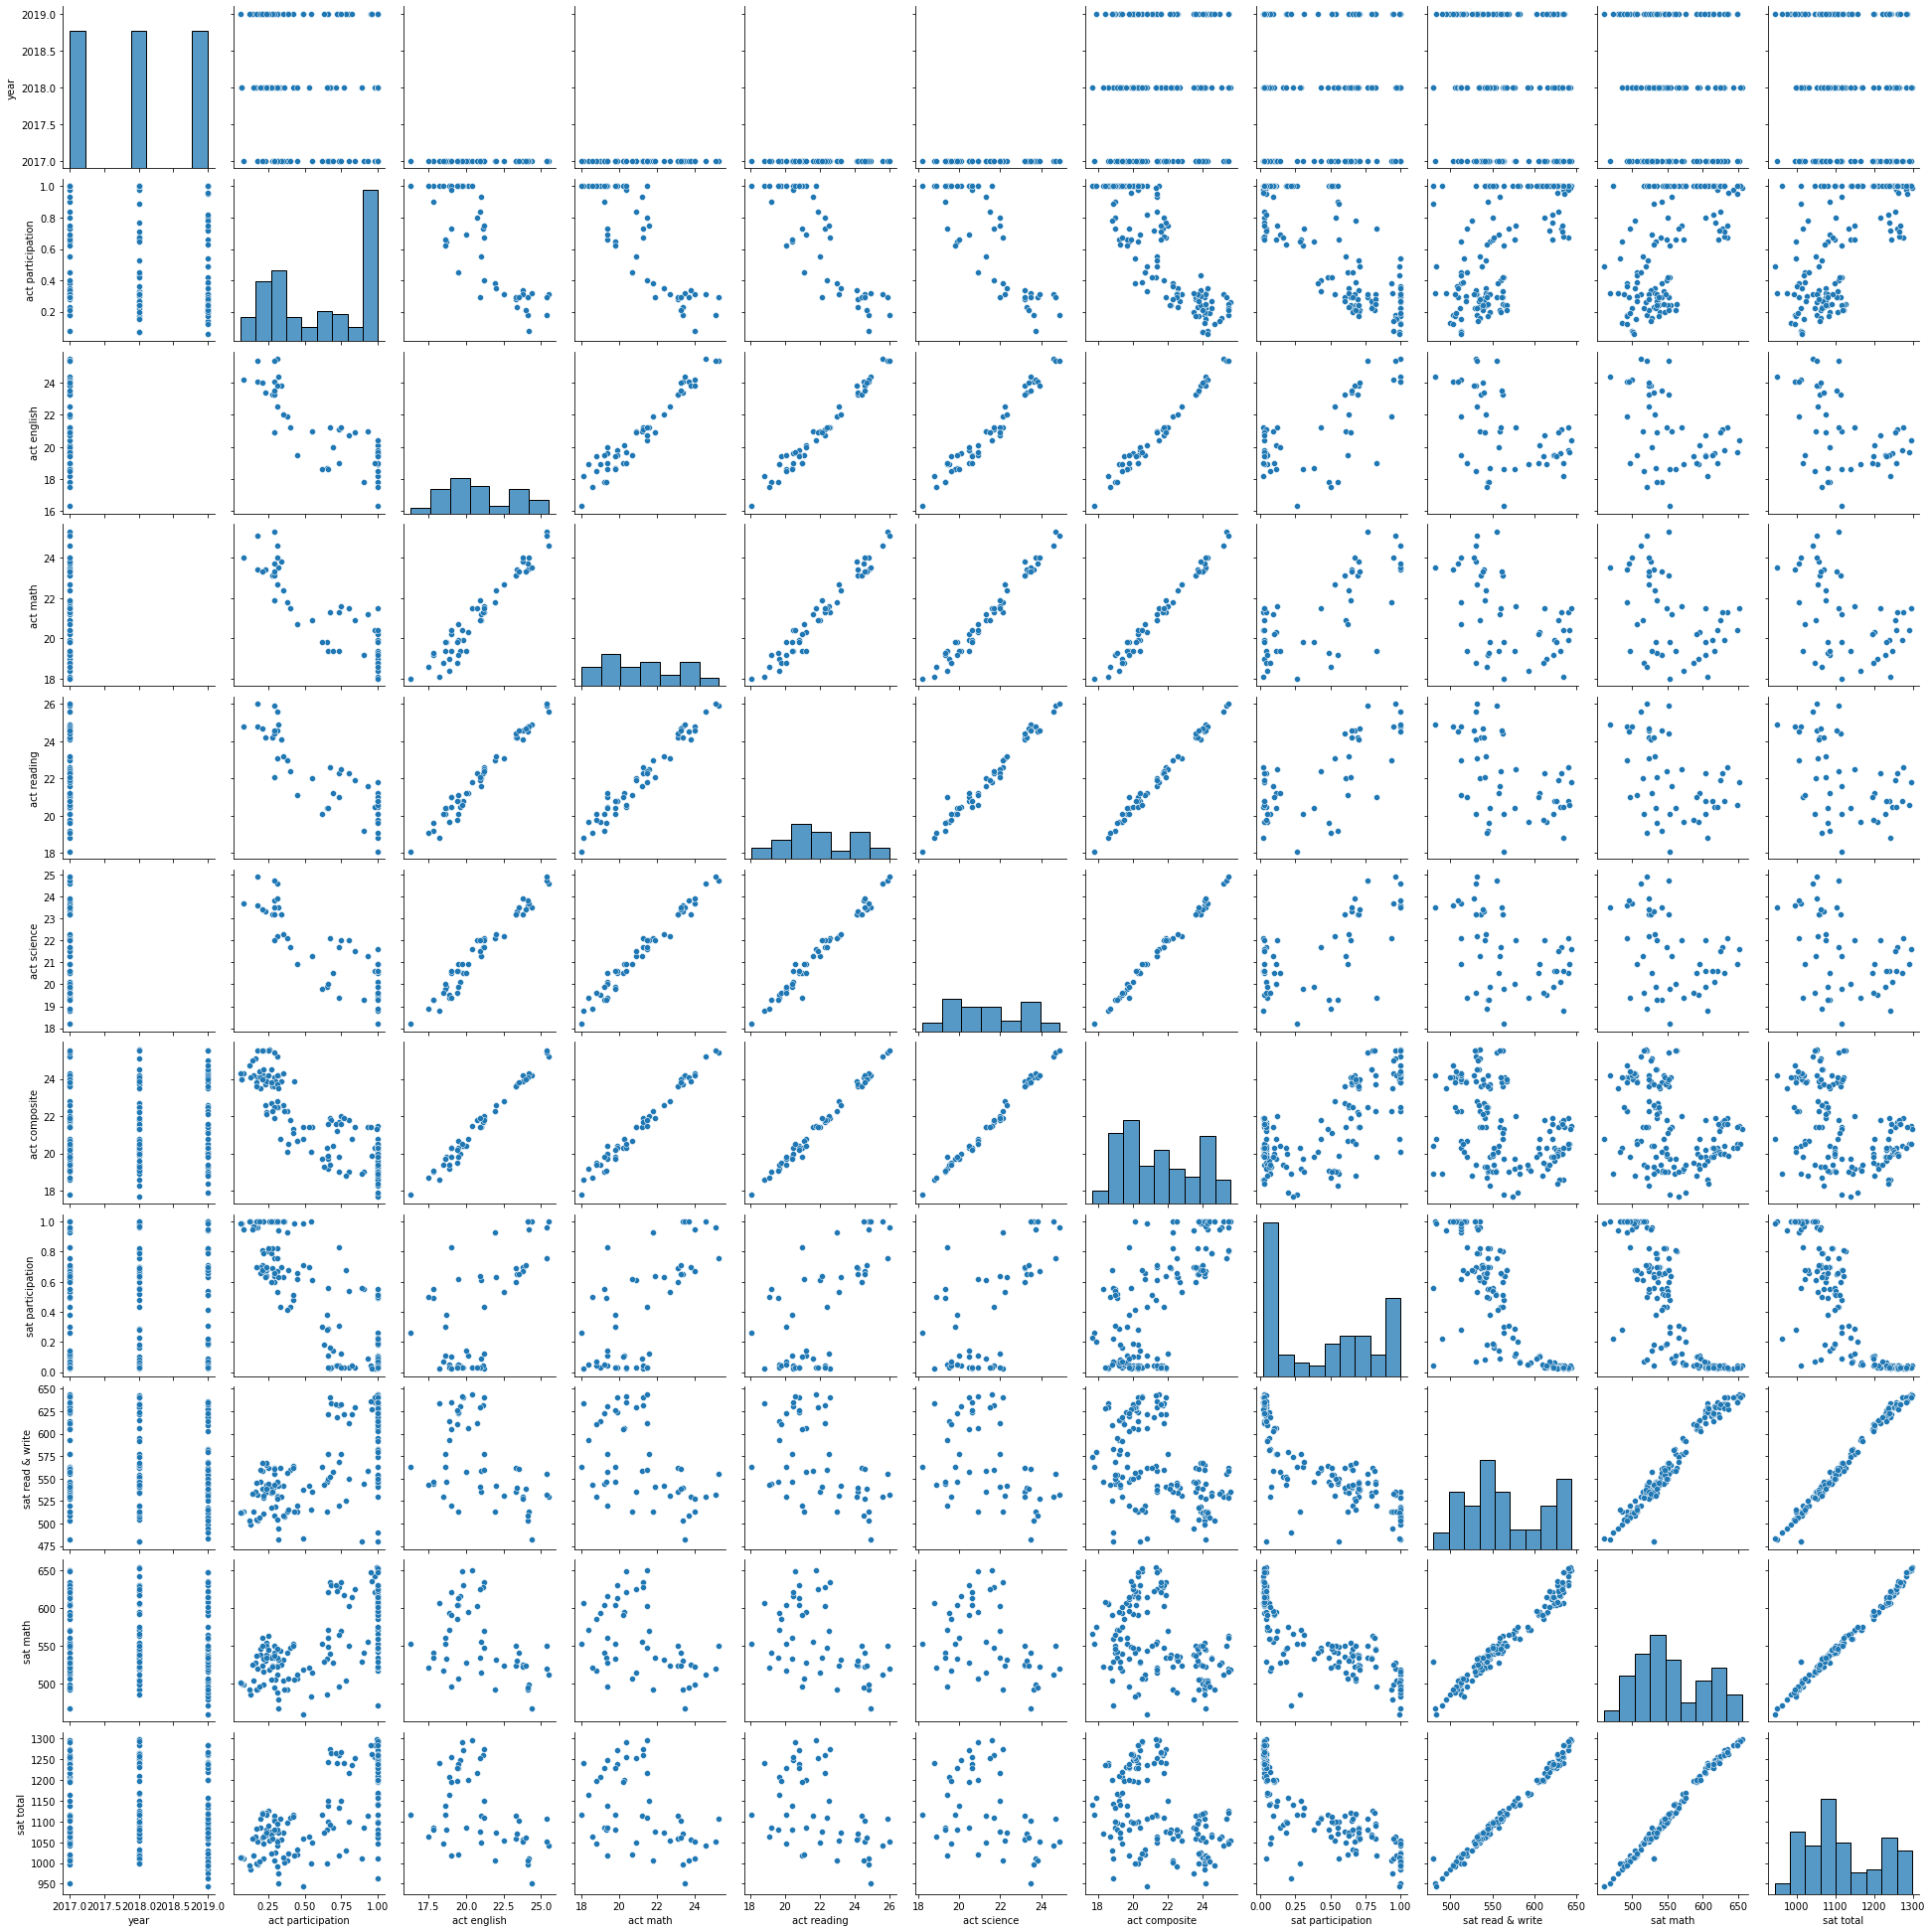

In [114]:
sns.pairplot(final.reset_index(drop = True))

#### Plot and interpret histograms for important columns

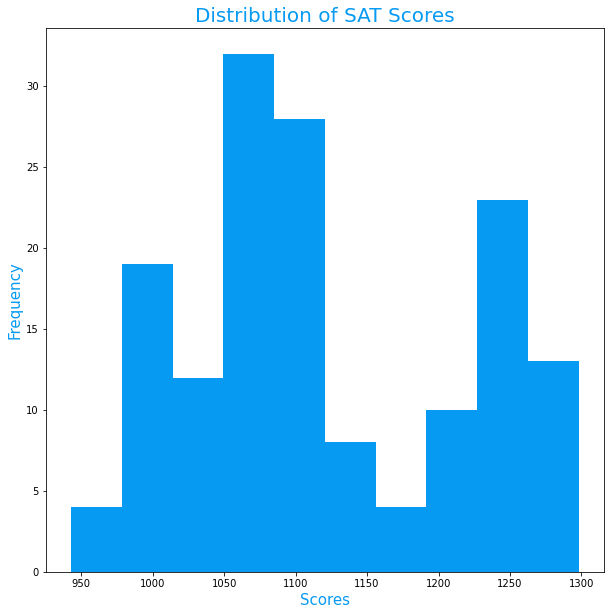

In [115]:
# Distribution of SAT Scores thoughout the Years
plt.figure(figsize=(10, 10))
plt.hist(final['sat total'], bins=10, color='#069AF3');
plt.title('Distribution of SAT Scores',c='#069AF3', fontdict={'fontsize':20})
plt.xlabel('Scores', c='#069AF3', fontsize= 15)
plt.ylabel('Frequency', c='#069AF3', fontsize =15);

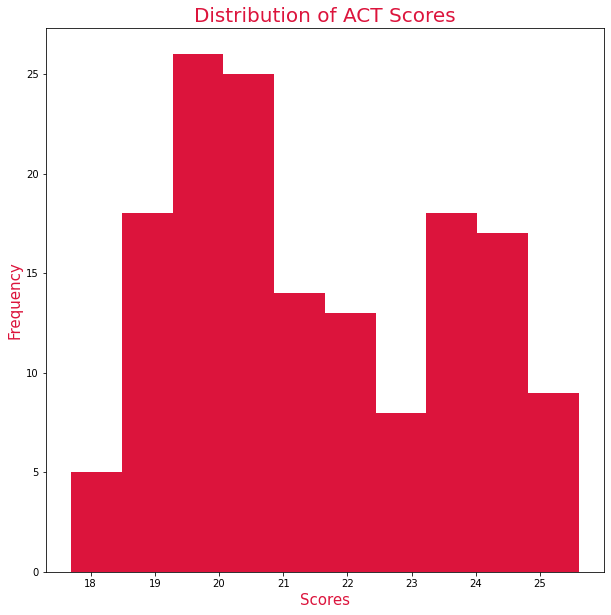

In [116]:
# Distribution of SAT Scores thoughout the Years
plt.figure(figsize=(10, 10))
plt.hist(final['act composite'], bins=10, color='crimson');
plt.title('Distribution of ACT Scores', c = 'crimson', fontdict={'fontsize':20})
plt.xlabel('Scores', c = 'crimson', fontsize= 15)
plt.ylabel('Frequency', c = 'crimson', fontsize =15);

#### Plot and interpret scatter plots for important columns


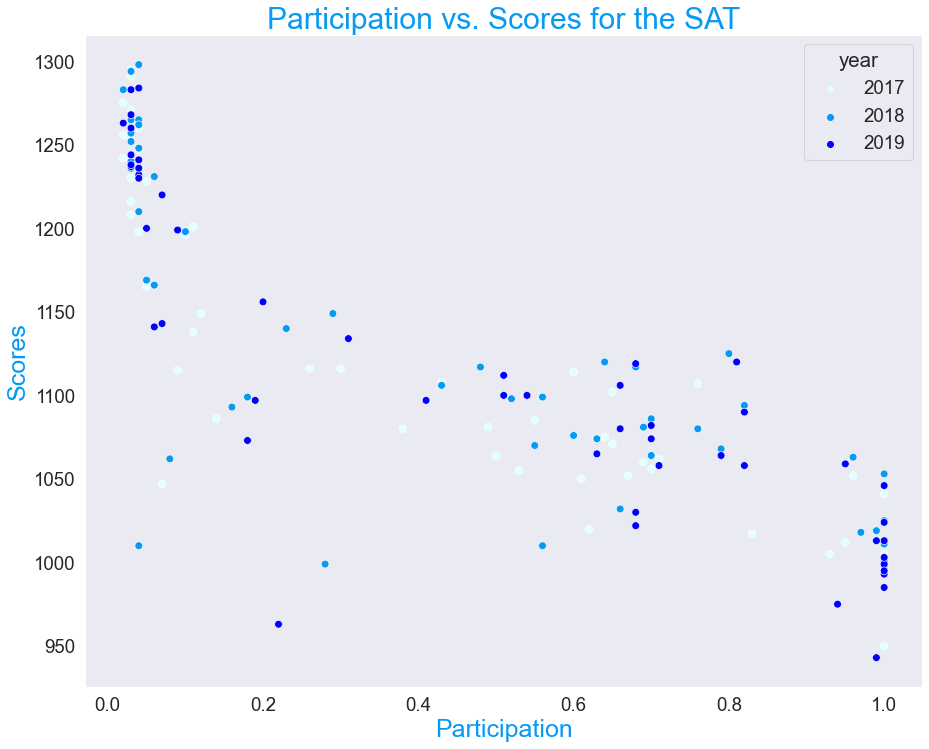

In [117]:
# Show the Relationship between Participation and Scores for the SAT throughout the Years
plt.figure(figsize=(15, 12))
sns.set(style="dark",font_scale=1.7)
sns.scatterplot(y='sat total', x='sat participation', data=final, hue = 'year', palette=['lightcyan','#069AF3','blue'], s=60);
plt.title('Participation vs. Scores for the SAT', c='#069AF3', fontdict={'fontsize':30})
plt.xlabel('Participation', fontsize= 25, c='#069AF3')
plt.ylabel('Scores', fontsize = 25, c='#069AF3');

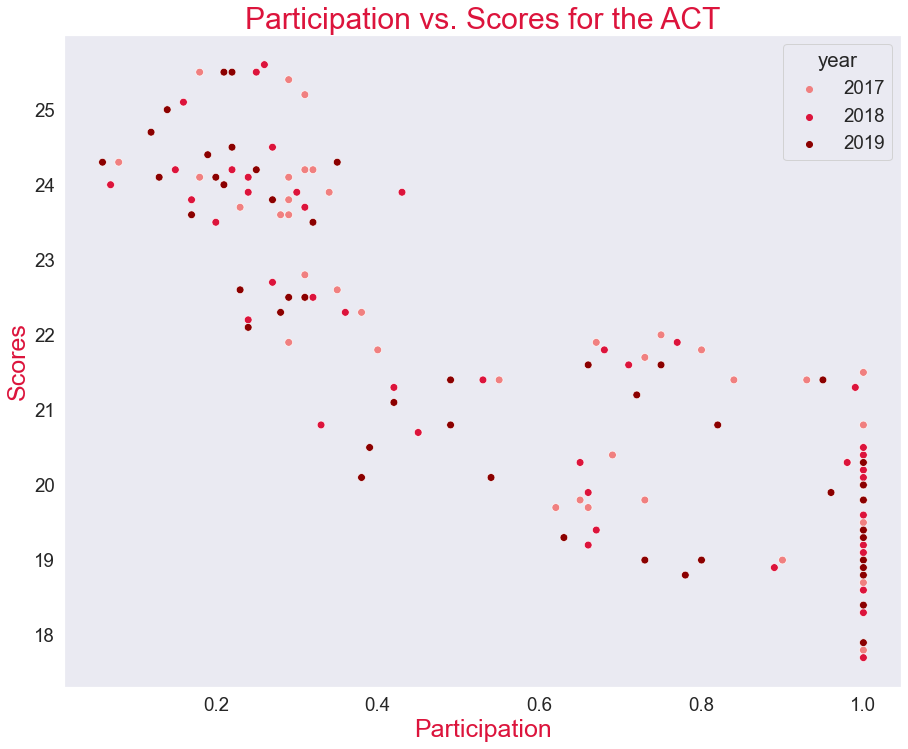

In [118]:
# Show the Relationship between Participation and Scores for the ACT throughout the Years
plt.figure(figsize=(15, 12))
sns.set(style="dark",font_scale=1.7)
sns.scatterplot(y='act composite', x='act participation', data=final, hue = 'year', palette=['lightcoral','crimson','darkred'], s=60);
plt.title('Participation vs. Scores for the ACT', c='crimson', fontdict={'fontsize':30})
plt.xlabel('Participation', fontsize= 25, c='crimson')
plt.ylabel('Scores', fontsize = 25, c='crimson');

In [119]:
final_2017 = final[final['year']==2017]
final_2018 = final[final['year']==2018]
final_2019 = final[final['year']==2019]

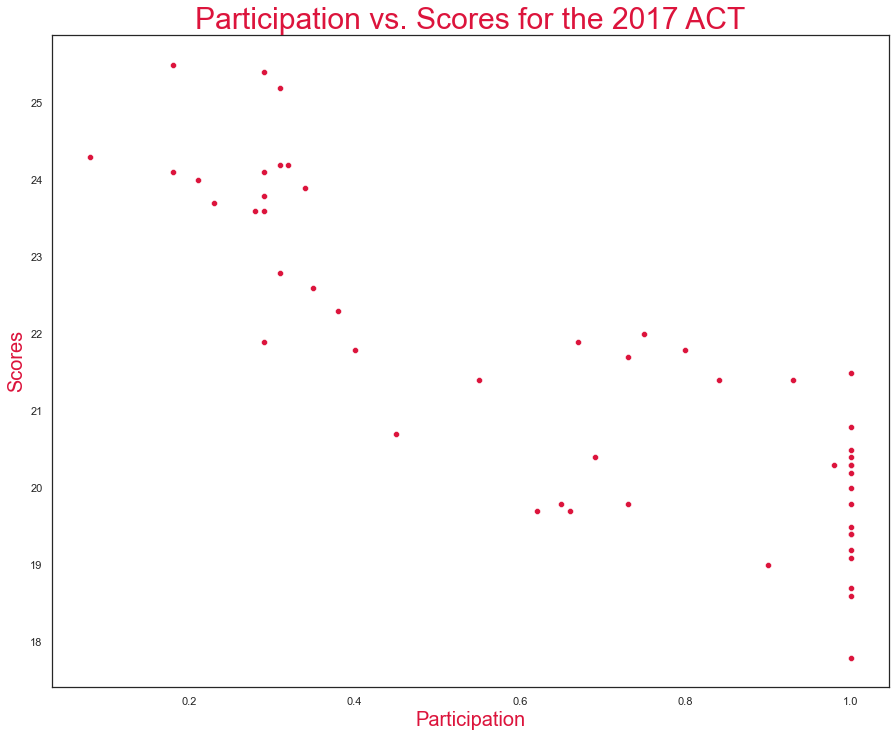

In [120]:
# Show the Relationship between Participation and Scores for the 2017 ACT Data
plt.figure(figsize=(15, 12))
sns.set(style="white")
sns.scatterplot(y='act composite', x='act participation', data = final_2017, color='crimson');
plt.title('Participation vs. Scores for the 2017 ACT', c='crimson', fontdict={'fontsize':30})
plt.xlabel('Participation', fontsize= 20, c='crimson')
plt.ylabel('Scores', fontsize = 20, c='crimson');

#### Plot and interpret boxplots for important columns


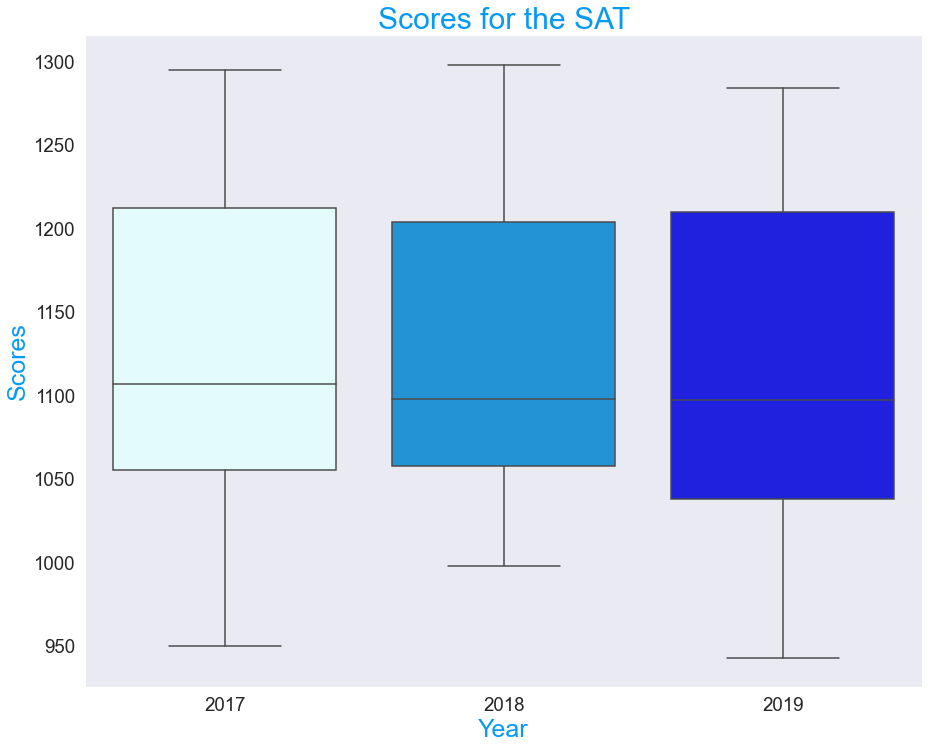

In [121]:
# Distrubtion of Scores for the SAT throughout the Years
plt.figure(figsize=(15,12))
sns.set(style="dark",font_scale=1.7)
sns.boxplot(data=final, x='year', y='sat total', palette=['lightcyan','#069AF3','blue']);
plt.title('Scores for the SAT', c='#069AF3', fontdict={'fontsize':30}) # just numeric columns
plt.xlabel('Year', fontsize= 25, c='#069AF3')
plt.ylabel('Scores', fontsize = 25, c='#069AF3');

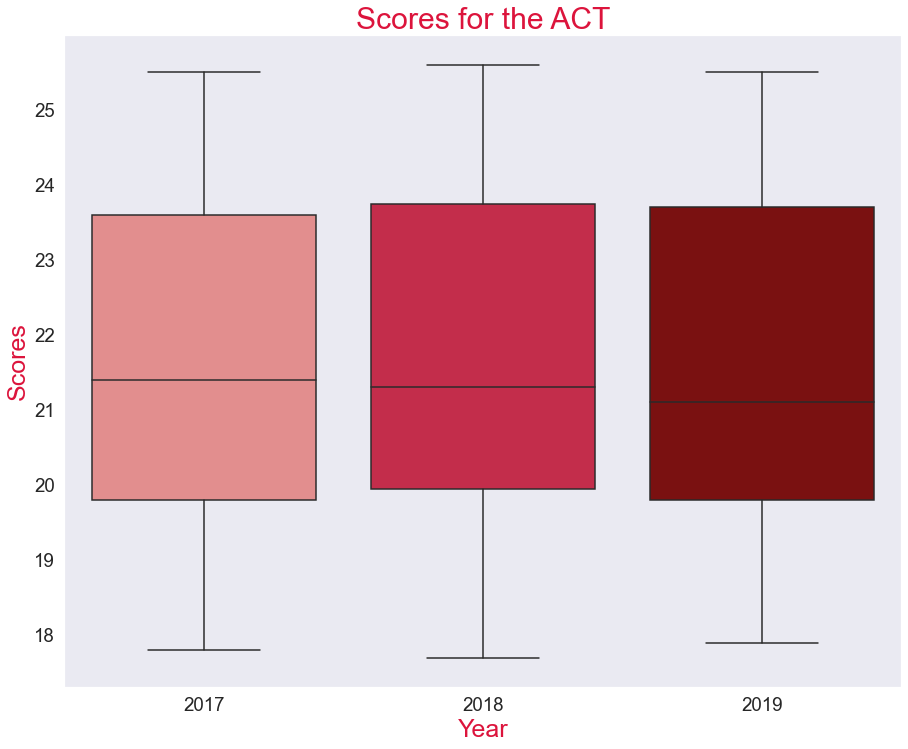

In [122]:
# Distribution of Scores for the ACT throughout the Years
plt.figure(figsize=(15,12))
sns.set(style="dark",font_scale=1.7)
sns.boxplot(data=final, x='year', y='act composite', palette=['lightcoral','crimson','darkred']);
plt.title('Scores for the ACT', c='crimson', fontdict={'fontsize':30}) # just numeric columns
plt.xlabel('Year', fontsize= 25, c='crimson')
plt.ylabel('Scores', fontsize = 25, c='crimson');

## Outside Research

Based on your observations, choose **one or more** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. 

If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. Make sure that you cite your sources.

**Analyzing States that have SAT School Days:**

"School Day expands access to the SAT and simplifies the test-taking experience. Students take the test at their own school, during a regular school day, usually at no cost to them. And according to a growing body of research, including a study on universal testing in Michigan and a similar study in Virginia, when students have greater access to college entrance exams like the SAT, more of them go to college.

SAT School Day can be implemented by individual schools or more broadly across entire districts or states. In 2018-19, 10 states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia) and the District of Columbia administered the SAT at no cost to students. That’s in addition to more than 200 school districts nationwide."

citation: https://reports.collegeboard.org/archive/sat-suite-program-results/2019/benefits-sat-school-day

In [123]:
sat_2019_part.tail(11)

,sat participation
state,
New Hampshire,0.95
West Virginia,0.99
Maine,0.99
Florida,1.00
Rhode Island,1.00
Colorado,1.00
Connecticut,1.00
Delaware,1.00
Michigan,1.00


**Analyzing Colorado:**

"They found that the College Board’s Practice SAT, given to 10th-graders, aligned better with the high school Colorado Academic Standards, a requirement of 2015 legislation, said Will Morton, director of assessment administration for the CDE."

citation:
https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/

In [124]:
final.reset_index(inplace = True)

In [125]:
colorado_sat_data = final.loc[final['state']=='Colorado',['year', 'sat total', 'sat participation']].sort_values(by = 'year')

In [126]:
colorado_sat_data

,year,sat total,sat participation
5,2017,1201,0.11
56,2018,1025,1.00
107,2019,1024,1.00


In [127]:
colorado_act_data = final.loc[final['state']=='Colorado',['year', 'act composite', 'act participation']].sort_values(by = 'year')

In [128]:
colorado_act_data

,year,act composite,act participation
5,2017,20.8,1.00
56,2018,23.9,0.30
107,2019,23.8,0.27


**Analyzing Texas:**

In [129]:
texas_sat_data = final.loc[final['state']=='Texas',['year', 'act participation', 'sat participation']].sort_values(by = 'year')

In [130]:
texas_sat_data

,year,act participation,sat participation
43,2017,0.45,0.62
94,2018,0.45,0.66
145,2019,0.39,0.68


In [131]:
texas_sat_data.mean()

year                 2018.000000
act participation       0.430000
sat participation       0.653333
dtype: float64

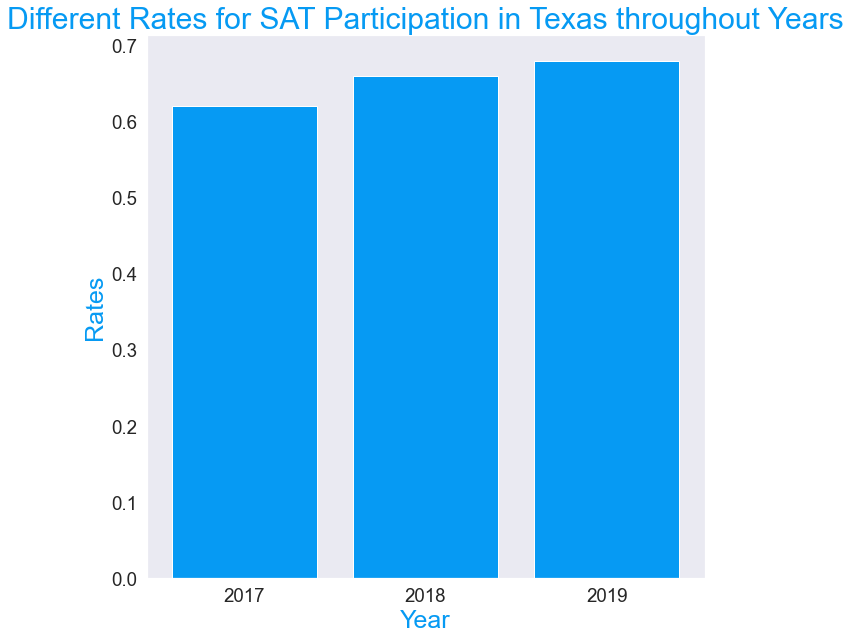

In [132]:
# Different Rates for SAT Participation in Texas throughout Years
plt.figure(figsize=(10, 10))
plt.bar(['2017', '2018', '2019'] , texas_sat_data['sat participation'], color='#069AF3')
plt.title('Different Rates for SAT Participation in Texas throughout Years', c = '#069AF3', fontdict={'fontsize':30})
plt.xlabel('Year', c = '#069AF3', fontsize= 25)
plt.ylabel('Rates', c = '#069AF3', fontsize =25);

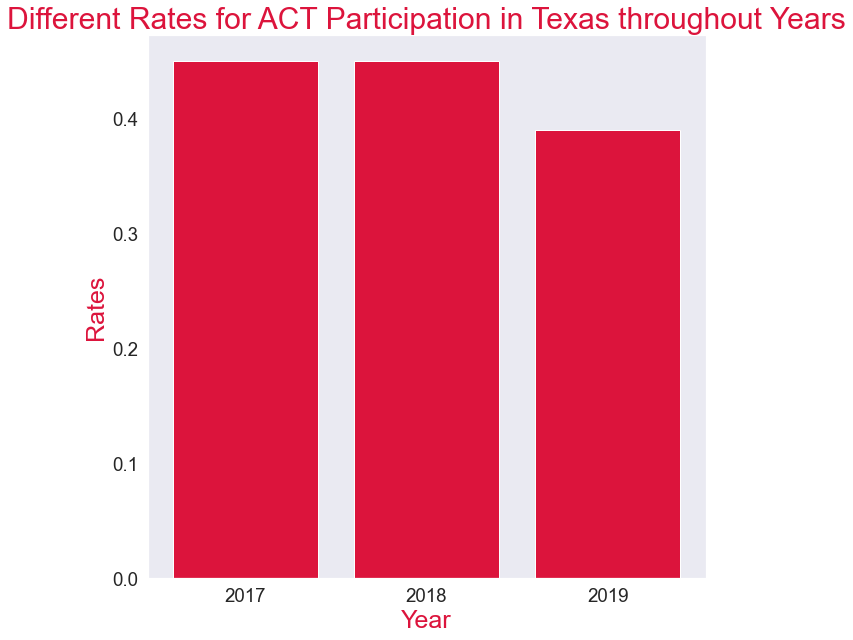

In [133]:
# Different Rates for ACT Participation in Texas throughout Years
plt.figure(figsize=(10, 10))
plt.bar(['2017', '2018', '2019'] , texas_sat_data['act participation'], color='crimson')
plt.title('Different Rates for ACT Participation in Texas throughout Years', c = 'crimson', fontdict={'fontsize':30})
plt.xlabel('Year', c = 'crimson', fontsize= 25)
plt.ylabel('Rates', c = 'crimson', fontsize =25);

**Analyzing Georgia:**

In [134]:
georgia_sat_data = final.loc[final['state']=='Georgia',['year', 'act participation', 'sat participation']].sort_values(by = 'year')

In [135]:
georgia_sat_data

,year,act participation,sat participation
10,2017,0.55,0.61
60,2018,0.53,0.70
112,2019,0.49,0.71


In [136]:
georgia_sat_data.mean()

year                 2018.000000
act participation       0.523333
sat participation       0.673333
dtype: float64

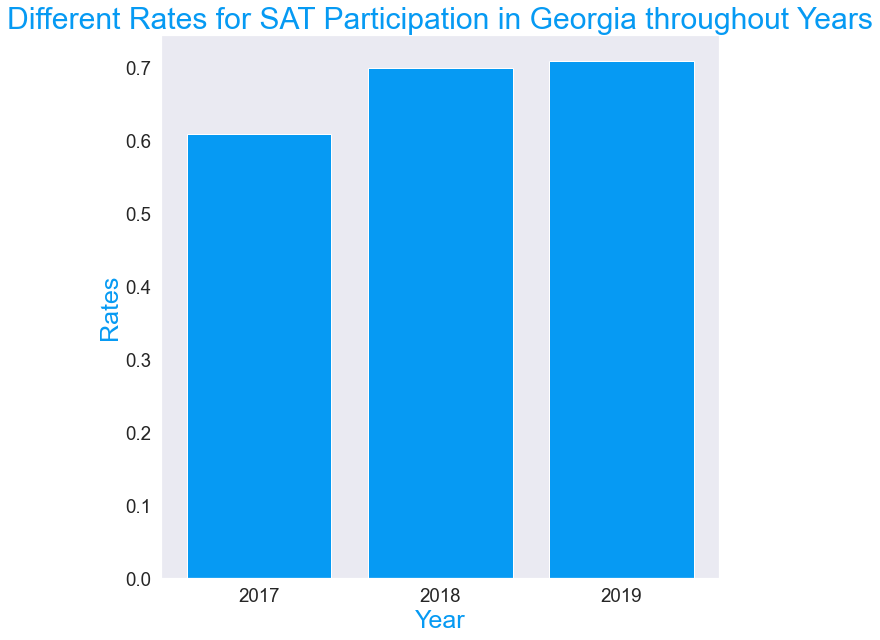

In [137]:
# Different Rates for SAT Participation in Georgia throughout Years
plt.figure(figsize=(10, 10))
plt.bar(['2017', '2018', '2019'] , georgia_sat_data['sat participation'], color='#069AF3')
plt.title('Different Rates for SAT Participation in Georgia throughout Years', c = '#069AF3', fontdict={'fontsize':30})
plt.xlabel('Year', c = '#069AF3', fontsize= 25)
plt.ylabel('Rates', c = '#069AF3', fontsize =25);

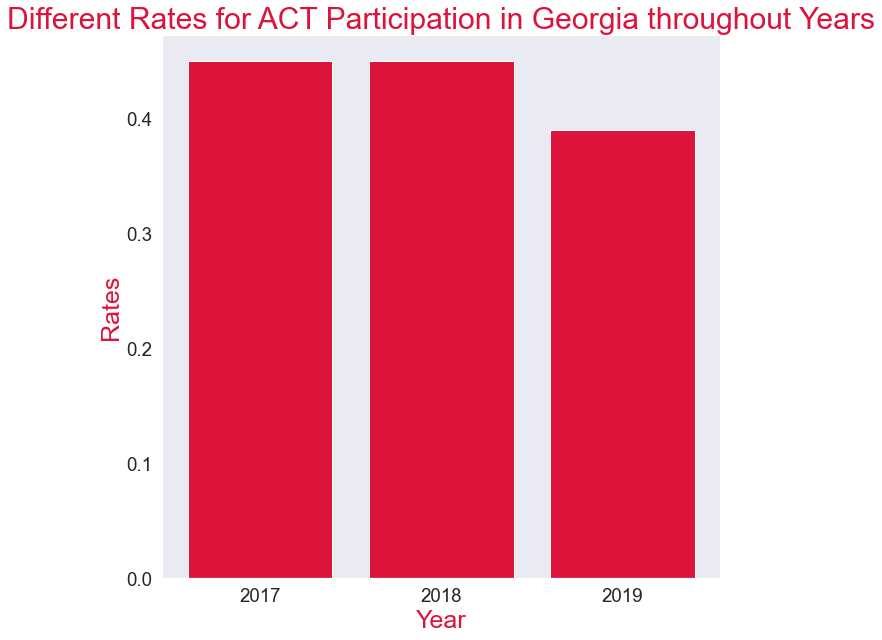

In [138]:
# Different Rates for ACT Participation in Georgia throughout Years
plt.figure(figsize=(10, 10))
plt.bar(['2017', '2018', '2019'] , texas_sat_data['act participation'], color='crimson')
plt.title('Different Rates for ACT Participation in Georgia throughout Years', c = 'crimson', fontdict={'fontsize':30})
plt.xlabel('Year', c = 'crimson', fontsize= 25)
plt.ylabel('Rates', c = 'crimson', fontsize =25);

**Summary of Findings:**

States that have SAT School Days:

- States that have SAT School Days have the highest participation rates. 


Colorado: 

- Since 2001, juniors in Colorado high schools were required to take the ACT. 

- In 2015, representative from school districts found that the College Board's Practice SAT aligned better with the high school Colorado Academic Standards.

- In 2018, juniors in Colorado high schools were required to take the SAT.

- Once Colorado switched from requiring ACT to SAT scores in 2018, the average score for the SAT significantly decreased and the average score for the ACT significicantly increased.

Texas:

- Each year the participation rate for the ACT decreases, meanwhile the participation for the SAT increases. Texas is not required to take either test yet, as shown in Texas participation rates.

Georgia:

- Each year the participation rate for the ACT decreases, meanwhile the participation for the SAT increases. Georgia is not required to take either test yet, as shown in Texas participation rates.

## Conclusions and Recommendations

Based on your exploration of the data, what are your 1 or 2 key recommendations for the College Board?

Ensure that your recommendations make sense. These datasets have some limitations - think about granularity, aggregation, the relationships between populations size and rates. Consider the actual populations these data are drawn from. It is okay if your conclusions are tentative. You do not want to make unsupported jumps in logic.

1) Convince more states and school districts to have more SAT School Days for greater overall participation. In 2018-2019, Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, West Virginia, and District of Columbia were all involved in SAT School Day. These all are also the states with the greatest participation rates for the year.

2) Consider each state's academic standards when creating SAT test content, as many states that require the SAT do so because they believe it aligns best with their standards, such as Colorado.

3) Target states where participation is similar between SAT and ACT, such as Texas and Georgia. They are likely to be affected by efforts since there isn't a test that's already required/favored. In addition, these states are already trending towards more participation rates for the SAT each year. 